In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from scipy.special import comb

In [58]:
from queue import Queue


N = 4
M = 4

graph = nx.Graph()

visited = set()
queue = Queue()

queue.put((0,) * M)

while not queue.empty():
    node = queue.get()
    if node in visited:
        continue
    visited.add(node)
    for i in range(M):
        if i > 0 and node[i] == node[i - 1]:
            continue
        if node[i] == N:
            continue
        new_node = list(node)
        new_node[i] += 1
        new_node = tuple(new_node)
        if new_node in visited:
            continue
        graph.add_edge(node, new_node)
        queue.put(new_node)

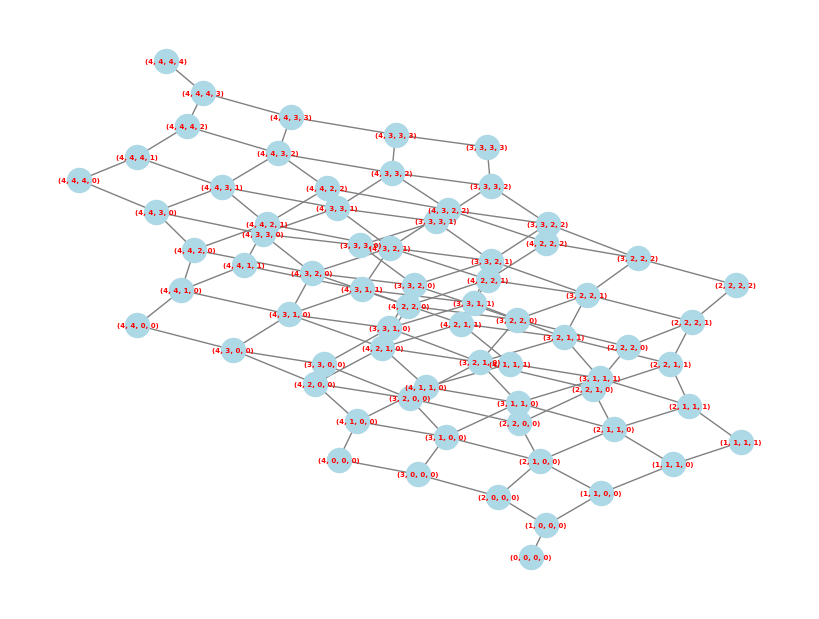

In [59]:
layout = nx.spring_layout(graph, seed=420)
options = {
    "node_color": 'lightblue',
    "edge_color": 'gray',
    "font_weight": 'bold',
    "with_labels": True,
    "font_size": 5,
    "font_color": 'red',
    "pos": layout
}
plt.figure(figsize=(8, 6), dpi=100)
nx.draw(graph, **options)
# nx. draw(G, with_labels=True,
plt.show()

In [60]:
D = min(M, N)
graph_copy = graph.copy()
colors = {}
for i in range(D + 1):
    dm = [v for v, deg in dict(graph_copy.degree).items() if deg < D]
    for v in dm:
        colors[v] = i
    graph_copy.remove_nodes_from(dm)

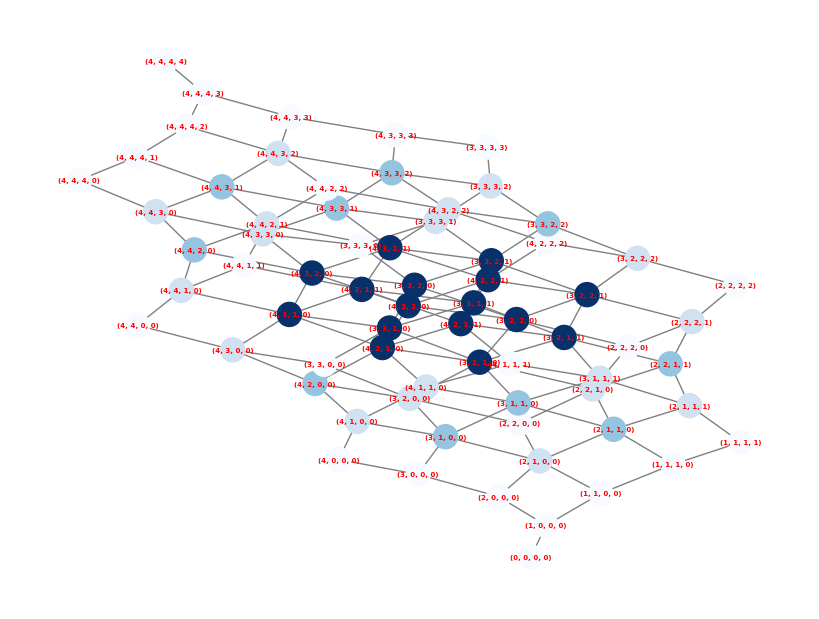

In [62]:
layout = nx.spring_layout(graph, seed=420)
true_colors = [colors.get(node, i + 1) for node in graph.nodes()]
options = {
    "node_color": true_colors,
    "edge_color": 'gray',
    "font_weight": 'bold',
    "cmap": plt.cm.Blues,
    "with_labels": True,
    "font_size": 5,
    "font_color": 'red',
    "pos": layout
}
plt.figure(figsize=(8, 6), dpi=100)
nx.draw(graph, **options)
plt.show()

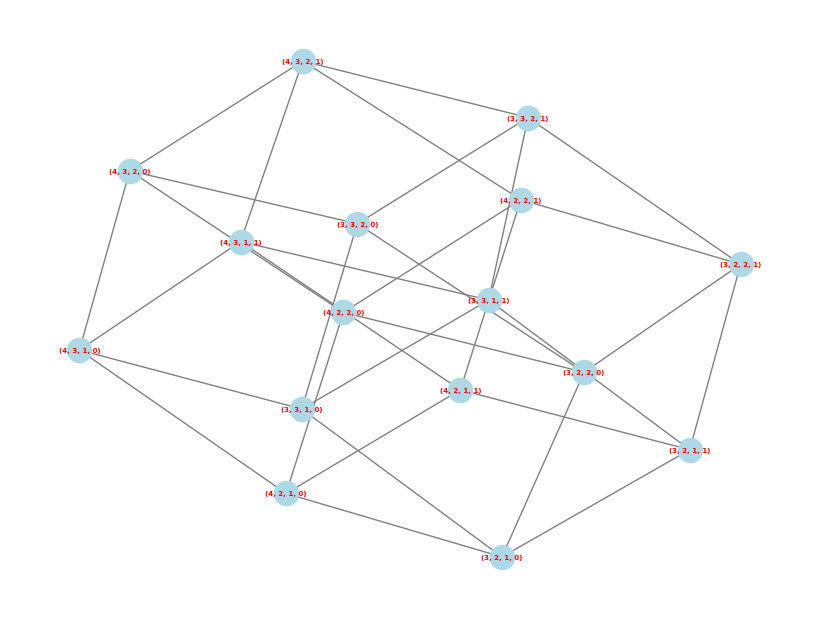

In [63]:
options = {
    "node_color": 'lightblue',
    "edge_color": 'gray',
    "font_weight": 'bold',
    "with_labels": True,
    "font_size": 5,
    "font_color": 'red',
    "pos": layout
}
plt.figure(figsize=(8, 6), dpi=100)
nx.draw(graph_copy, **options)